##### References:
* https://www.youtube.com/watch?v=YCzL96nL7j0&list=PLblh5JKOoLUIxGDQs4LFFD--41Vzf-ME1&index=18&ab_channel=StatQuestwithJoshStarmer
* https://wandb.ai/sauravmaheshkar/LSTM-PyTorch/reports/Using-LSTM-in-PyTorch-A-Tutorial-With-Examples--VmlldzoxMDA2NTA5
* https://stackoverflow.com/questions/48302810/whats-the-difference-between-hidden-and-output-in-pytorch-lstm
* https://freedium.cfd/https://towardsdatascience.com/sentiment-analysis-using-lstm-step-by-step-50d074f09948

In [ ]:
# LSTM theory, and concept
# LSTM implementation in PyTorch for sentiment classification and spell checker problem
# what is xLSTM ?  A new paper came out on 7th may, 2024

In [ ]:
# LSTM for SMS Spam classification

# 3 Methods to generate / embeddings:
# 1. use word2vec to train your embeddings [used in this code]
# 2. Use existing embedding like glove
# 3. user BERT embeddings


# 4 methods for ML modelling
# 1. use the embeddings as is and train a tradition ML model like RF, GBM, etc. 
# 2. Use the embeddng as is and train a Neural Network model but not embeddings (linear layer, lstm layer,etc.)
# 3. Use the embeddings and finetune/retrain them during training process of Neural Network [used in this code]
# 4. Use BERTforClassification model which use BERT embeddings and cls token of BERT model to classfiy

# In this section, we will use, embedding (1st option) and modelling (3rd option) combination

In [1]:
import pandas as pd
import os

os.getcwd()

'c:\\Users\\manpresingh\\OneDrive - Microsoft\\Personal\\PyTorch_and_Advanced NLP'

### Data Prep

In [2]:
data = pd.read_csv('SMSSpamCollection.tsv', sep='\t', header=None)

In [3]:
data.rename(columns={0:'target',1:'input'}, inplace=True)

In [4]:
data.head()

,target,input
0,ham,I've been searching for the right words to tha...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro..."
3,ham,Even my brother is not like to speak with me. ...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(data.input, 
                                                    data.target, 
                                                    test_size=.2, 
                                                    stratify=data.target,
                                                    random_state=100
                                                    )

In [7]:
X_train.reset_index(inplace=True, drop=True)
X_test.reset_index(inplace=True, drop=True)
y_train.reset_index(inplace=True, drop=True)
y_test.reset_index(inplace=True, drop=True)

In [8]:
X_train_df = pd.DataFrame(X_train, columns=['input'])
X_test_df = pd.DataFrame(X_test, columns=['input'])
X_train_df

,input
0,Wrong phone! This phone! I answer this one but...
1,When ü login dat time... Dad fetching ü home now?
2,A guy who gets used but is too dumb to realize...
3,"Hey sweet, I was wondering when you had a mome..."
4,Y lei?
...,...
4449,Yes :)it completely in out of form:)clark also...
4450,"Alright omw, gotta change my order to a half8th"
4451,Ranjith cal drpd Deeraj and deepak 5min hold
4452,I have to take exam with in march 3


In [9]:
import gensim

### Basic Data cleaning

In [10]:
# text cleaning:

def simple_prep_process( data): ## lowercases, tokenizes, and de-accents the text
        return data.apply(lambda x:  gensim.utils.simple_preprocess(x, deacc=True))

In [11]:
X_train_df['cleaned_input'] =  simple_prep_process(X_train_df.input)
X_test_df['cleaned_input'] =  simple_prep_process(X_test_df.input)

In [12]:
X_train_df

,input,cleaned_input
0,Wrong phone! This phone! I answer this one but...,"[wrong, phone, this, phone, answer, this, one,..."
1,When ü login dat time... Dad fetching ü home now?,"[when, login, dat, time, dad, fetching, home, ..."
2,A guy who gets used but is too dumb to realize...,"[guy, who, gets, used, but, is, too, dumb, to,..."
3,"Hey sweet, I was wondering when you had a mome...","[hey, sweet, was, wondering, when, you, had, m..."
4,Y lei?,[lei]
...,...,...
4449,Yes :)it completely in out of form:)clark also...,"[yes, it, completely, in, out, of, form, clark..."
4450,"Alright omw, gotta change my order to a half8th","[alright, omw, gotta, change, my, order, to, h..."
4451,Ranjith cal drpd Deeraj and deepak 5min hold,"[ranjith, cal, drpd, deeraj, and, deepak, min,..."
4452,I have to take exam with in march 3,"[have, to, take, exam, with, in, march]"


### Word2Vec model training

In [13]:
from gensim.models import Word2Vec, Doc2Vec

In [14]:
embed_size=300
w2v_model = Word2Vec(sentences = X_train_df['cleaned_input'],
         window=7, min_count=1,
         sg=1,
         vector_size=embed_size)

In [15]:
len(w2v_model.wv.key_to_index)

6901

In [16]:
w2v_model.wv.key_to_index

{'to': 0,
 'you': 1,
 'the': 2,
 'and': 3,
 'in': 4,
 'is': 5,
 'me': 6,
 'my': 7,
 'it': 8,
 'for': 9,
 'your': 10,
 'of': 11,
 'call': 12,
 'that': 13,
 'have': 14,
 'on': 15,
 'now': 16,
 'are': 17,
 'can': 18,
 'but': 19,
 'so': 20,
 'not': 21,
 'we': 22,
 'or': 23,
 'ur': 24,
 'do': 25,
 'if': 26,
 'will': 27,
 'at': 28,
 'get': 29,
 'be': 30,
 'with': 31,
 'no': 32,
 'just': 33,
 'this': 34,
 'gt': 35,
 'lt': 36,
 'when': 37,
 'ok': 38,
 'how': 39,
 'up': 40,
 'go': 41,
 'what': 42,
 'from': 43,
 'free': 44,
 'out': 45,
 'know': 46,
 'all': 47,
 'll': 48,
 'am': 49,
 'then': 50,
 'day': 51,
 'like': 52,
 'he': 53,
 'good': 54,
 'got': 55,
 'was': 56,
 'come': 57,
 'there': 58,
 'its': 59,
 'only': 60,
 'time': 61,
 'love': 62,
 'text': 63,
 'send': 64,
 'want': 65,
 'txt': 66,
 'need': 67,
 'by': 68,
 'home': 69,
 'as': 70,
 'one': 71,
 'she': 72,
 'going': 73,
 'don': 74,
 'lor': 75,
 'stop': 76,
 'still': 77,
 'today': 78,
 'da': 79,
 'our': 80,
 'dont': 81,
 'see': 82,
 'sorry

In [17]:
w2v_model.wv.index_to_key

['to',
 'you',
 'the',
 'and',
 'in',
 'is',
 'me',
 'my',
 'it',
 'for',
 'your',
 'of',
 'call',
 'that',
 'have',
 'on',
 'now',
 'are',
 'can',
 'but',
 'so',
 'not',
 'we',
 'or',
 'ur',
 'do',
 'if',
 'will',
 'at',
 'get',
 'be',
 'with',
 'no',
 'just',
 'this',
 'gt',
 'lt',
 'when',
 'ok',
 'how',
 'up',
 'go',
 'what',
 'from',
 'free',
 'out',
 'know',
 'all',
 'll',
 'am',
 'then',
 'day',
 'like',
 'he',
 'good',
 'got',
 'was',
 'come',
 'there',
 'its',
 'only',
 'time',
 'love',
 'text',
 'send',
 'want',
 'txt',
 'need',
 'by',
 'home',
 'as',
 'one',
 'she',
 'going',
 'don',
 'lor',
 'stop',
 'still',
 'today',
 'da',
 'our',
 'dont',
 'see',
 'sorry',
 'reply',
 'about',
 'hi',
 'back',
 'tell',
 'later',
 'new',
 'mobile',
 'her',
 'they',
 'take',
 'please',
 'pls',
 'dear',
 'has',
 'did',
 'some',
 'any',
 'been',
 'think',
 'phone',
 'week',
 'happy',
 'well',
 'here',
 'much',
 'him',
 'who',
 're',
 'claim',
 'night',
 'msg',
 'oh',
 'an',
 'more',
 'hope',


In [18]:
w2v_model.wv.key_to_index['how']

39

In [19]:
w2v_model.wv.get_vector(39, norm=True)[0:10]

array([-0.02374805,  0.02411845,  0.04178381, -0.01003914, -0.00816165,
       -0.04482841,  0.07250968,  0.143382  , -0.05052074,  0.01574509],
      dtype=float32)

In [20]:
w2v_model.wv.get_mean_vector([39])[0:10]

array([-0.02374805,  0.02411845,  0.04178381, -0.01003914, -0.00816165,
       -0.04482841,  0.07250968,  0.143382  , -0.05052074,  0.01574509],
      dtype=float32)

In [21]:
w2v_model.wv.most_similar('it')

[('yeah', 0.9887168407440186),
 ('so', 0.9883874654769897),
 ('not', 0.9880831837654114),
 ('leave', 0.9878035187721252),
 ('would', 0.9876258373260498),
 ('some', 0.9873898029327393),
 ('sure', 0.9858775734901428),
 ('feel', 0.9854843616485596),
 ('anything', 0.9844465255737305),
 ('still', 0.9842578768730164)]

In [22]:
X_train_df.cleaned_input[0]

['wrong',
 'phone',
 'this',
 'phone',
 'answer',
 'this',
 'one',
 'but',
 'assume',
 'the',
 'other',
 'is',
 'people',
 'don',
 'well']

In [23]:
w2v_model.wv.most_similar('phone')

[('message', 0.9905399680137634),
 ('messages', 0.985508143901825),
 ('auction', 0.9813528060913086),
 ('video', 0.9805682897567749),
 ('matches', 0.9794613718986511),
 ('help', 0.9777042865753174),
 ('chat', 0.9769793748855591),
 ('charged', 0.9769526720046997),
 ('anytime', 0.9746265411376953),
 ('sms', 0.9737330675125122)]

In [24]:
w2v_model.wv.get_mean_vector(X_train_df.cleaned_input[0])
# This represents the mean embedding of 1st sentence.
# this is useful when you want to use the embedding for an ML model or DNN model without finetuning of embeddings

array([-0.01468935,  0.09329865,  0.01139603, -0.01414003, -0.00312669,
       -0.0754635 ,  0.09235419,  0.15892117, -0.01324129, -0.02070625,
        0.05442693, -0.05202466, -0.03242349,  0.00623638, -0.04997925,
       -0.04900598,  0.06879523,  0.0393179 , -0.01099679, -0.05739897,
       -0.00159076,  0.01096544,  0.07056113,  0.0460242 ,  0.0414007 ,
        0.00939548, -0.08509862,  0.0106426 , -0.01960896, -0.11271759,
        0.04097468, -0.02700268,  0.01844363,  0.0242858 , -0.03104407,
        0.06121678,  0.03333876, -0.10797112,  0.0016697 , -0.02105695,
       -0.01215213, -0.00793035, -0.01136781, -0.09075748,  0.01556675,
        0.13694733,  0.03612873,  0.01919838, -0.02720827,  0.06151343,
        0.05569122,  0.01470758, -0.01789406,  0.05065639, -0.02390366,
        0.11120308,  0.03560378,  0.009002  ,  0.01494804, -0.00337179,
       -0.02409037, -0.03222944,  0.01149394,  0.0091767 , -0.04551934,
        0.03605727, -0.05393902, -0.02051787, -0.04456379,  0.00

In [25]:
X_train_df.shape

(4454, 2)

In [26]:
w2v_model.wv.get_mean_vector(['jhndfskjvbgkd'])
# for unknown words, the return embedding is 0 

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [27]:
X_train_df.shape

(4454, 2)

In [28]:
import numpy as np

In [29]:
# # This can be used to generate embedding for the entire data

# %%time
# embedding_list=[]
# for i in range(0, len(X_train_df)):
#     try:
#         embedding_list.append(w2v_model.wv.get_mean_vector(X_train_df.cleaned_input[i]))
#     except:
#         print(i)
#         embedding_list.append(np.random.normal(scale=.6,size=(embed_size,)))
#         # scale represents the Standard deviation of the data
#         # larger value results in a winder distribution of values

In [30]:
w2v_model.wv.key_to_index

{'to': 0,
 'you': 1,
 'the': 2,
 'and': 3,
 'in': 4,
 'is': 5,
 'me': 6,
 'my': 7,
 'it': 8,
 'for': 9,
 'your': 10,
 'of': 11,
 'call': 12,
 'that': 13,
 'have': 14,
 'on': 15,
 'now': 16,
 'are': 17,
 'can': 18,
 'but': 19,
 'so': 20,
 'not': 21,
 'we': 22,
 'or': 23,
 'ur': 24,
 'do': 25,
 'if': 26,
 'will': 27,
 'at': 28,
 'get': 29,
 'be': 30,
 'with': 31,
 'no': 32,
 'just': 33,
 'this': 34,
 'gt': 35,
 'lt': 36,
 'when': 37,
 'ok': 38,
 'how': 39,
 'up': 40,
 'go': 41,
 'what': 42,
 'from': 43,
 'free': 44,
 'out': 45,
 'know': 46,
 'all': 47,
 'll': 48,
 'am': 49,
 'then': 50,
 'day': 51,
 'like': 52,
 'he': 53,
 'good': 54,
 'got': 55,
 'was': 56,
 'come': 57,
 'there': 58,
 'its': 59,
 'only': 60,
 'time': 61,
 'love': 62,
 'text': 63,
 'send': 64,
 'want': 65,
 'txt': 66,
 'need': 67,
 'by': 68,
 'home': 69,
 'as': 70,
 'one': 71,
 'she': 72,
 'going': 73,
 'don': 74,
 'lor': 75,
 'stop': 76,
 'still': 77,
 'today': 78,
 'da': 79,
 'our': 80,
 'dont': 81,
 'see': 82,
 'sorry

In [31]:
train_vocab = w2v_model.wv.key_to_index
max_len = len(train_vocab)
print(max_len)
word_embedding_matrix =  np.zeros((max_len+2, embed_size))

words_found = 0

for i, word in enumerate(train_vocab):
    try:
        word_embedding_matrix[i]=w2v_model.wv.get_vector(word)
        words_found+=1
    except:
        word_embedding_matrix[i] = np.random.random(scale=.6, size=(embed_size,)) # initiating with random embedding if the word is not found

6901


In [32]:
words_found
# since all the words were found.
# it may happen that in case of glove or any other pretrained embedding, some of our vocab words may not get the embedding
# So, then we initalise it with a random number and those embeddings get trained in the model

6901

In [33]:
len(word_embedding_matrix)
# 2 tokens are special tokens:
# 1 is for unknown words 
# 2 is for padding

6903

In [34]:
word_embedding_matrix[6900]

array([-0.00213421,  0.08319373, -0.00307551, -0.00632045,  0.00073658,
       -0.05731566,  0.06889573,  0.12039211,  0.00667827, -0.01702029,
        0.01650507, -0.05818404, -0.01472228, -0.00278136, -0.0504868 ,
       -0.02808529,  0.04976697,  0.03132056,  0.01230987, -0.02285974,
       -0.02173179,  0.01532518,  0.0232347 ,  0.01716266,  0.04401084,
        0.01522208, -0.05375575,  0.00636158, -0.03266628, -0.08050966,
        0.02765307, -0.01518863,  0.00304913,  0.01109835, -0.01800775,
        0.03192253,  0.0240612 , -0.08116411,  0.0107867 , -0.01124895,
       -0.01135468, -0.00504569, -0.01935798, -0.0646401 ,  0.0057032 ,
        0.08646332,  0.023635  ,  0.04227151, -0.02711099,  0.05276152,
        0.03342827, -0.0066904 , -0.01788171,  0.01440656, -0.0032945 ,
        0.08038515,  0.02799698, -0.00886598,  0.01303431, -0.00786736,
       -0.03345012, -0.02562152,  0.00467262,  0.01995642, -0.01395349,
        0.020518  , -0.03054541, -0.00894857, -0.03701971,  0.01

In [35]:
word_embedding_matrix[6901:]
# last 2 are zero as they are for unknown words and padding

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 

### Tokenization

In [36]:
def word_tokens(sentence):
    sent_tok=[]
    for word in sentence:
        try:
            sent_tok.append(train_vocab[word])

        except:
            sent_tok.append(6901) # for Unkown words
    return sent_tok

In [37]:

sentence_tok=[]
sentence_tok=[word_tokens(sentence) for sentence in X_train_df.cleaned_input];

In [38]:
sentence_tok

[[754, 104, 34, 104, 562, 34, 71, 19, 2028, 2, 210, 5, 274, 74, 107],
 [37, 1315, 264, 61, 476, 3464, 69, 16],
 [473, 111, 966, 717, 19, 5, 121, 2693, 0, 2669, 8],
 [125,
  310,
  56,
  952,
  37,
  1,
  133,
  1002,
  26,
  1,
  356,
  57,
  0,
  6,
  65,
  0,
  64,
  1733,
  0,
  189,
  19,
  8,
  137,
  41,
  181,
  1546,
  9,
  161,
  303,
  850,
  1534,
  1101,
  438,
  37,
  1,
  662,
  40,
  13,
  1252,
  9,
  6,
  0,
  41,
  0,
  3,
  653,
  2,
  2372,
  3553,
  223,
  1,
  88,
  6,
  39,
  0,
  25,
  13,
  23,
  25,
  1,
  46,
  100,
  210,
  128,
  0,
  653,
  374,
  2399,
  303,
  93,
  18,
  653,
  257,
  1206,
  43,
  2,
  1199,
  101,
  186,
  168,
  30,
  123,
  7,
  2312,
  1222,
  369],
 [465],
 [26, 21, 248, 47, 624, 50, 48, 41, 69, 75, 26, 232, 191, 52, 781, 8, 38],
 [103, 236, 9, 2, 245, 380, 2137, 6, 37, 1, 29, 58, 26, 1, 357, 29, 58],
 [97, 27, 12, 3453, 96, 3447],
 [158, 9, 397, 45, 9, 6, 143, 1106],
 [3433,
  24,
  643,
  5,
  15,
  2,
  128,
  126,
  321,
  217

In [39]:
sentence_tok[0]

[754, 104, 34, 104, 562, 34, 71, 19, 2028, 2, 210, 5, 274, 74, 107]

In [40]:
X_train_df.cleaned_input[0]

['wrong',
 'phone',
 'this',
 'phone',
 'answer',
 'this',
 'one',
 'but',
 'assume',
 'the',
 'other',
 'is',
 'people',
 'don',
 'well']

In [41]:
for word in X_train_df.cleaned_input[0]:
    print(w2v_model.wv.key_to_index[word])

754
104
34
104
562
34
71
19
2028
2
210
5
274
74
107


In [42]:

import torch
from torch.nn.utils.rnn import pad_sequence
from torch.utils.data import Dataset, DataLoader

In [43]:
text_list=[]
for sent_tok in sentence_tok:
    processed_text = torch.tensor(sent_tok, dtype=torch.int64)
    text_list.append(processed_text)

#### padding

In [44]:


text_list = pad_sequence(text_list, batch_first=True, padding_value=6902)

In [45]:
text_list

tensor([[ 754,  104,   34,  ..., 6902, 6902, 6902],
        [  37, 1315,  264,  ..., 6902, 6902, 6902],
        [ 473,  111,  966,  ..., 6902, 6902, 6902],
        ...,
        [2176, 1172, 2704,  ..., 6902, 6902, 6902],
        [  14,    0,   94,  ..., 6902, 6902, 6902],
        [   7,  262,  237,  ..., 6902, 6902, 6902]])

### Dataset and DataLoader

In [46]:
y_train_num = np.where(y_train=='ham',0,1)

In [47]:

train_embedding_dataloader = DataLoader(
list(
    zip(
        text_list,
        torch.tensor(y_train_num, dtype=torch.float32)
        )
    ),
batch_size=64
    
)


In [48]:
# train_vocab, embed_size, word_embedding_matrix
# vocab_size = word_embedding_matrix.shape[0]


### Embedding vs EmbeddingBag
* EmbeddingBag = Embedding + mean/mode operation to reduce the dimentionality
* we can say to convert the embeddings of the words, in sentence, into single embedding representing the entire sentence

In [50]:
word_embedding_matrix.shape

(6903, 300)

In [51]:
w2v_model.wv.key_to_index['word']

326

In [52]:
w2v_model.wv.get_vector("word")


array([-7.66673684e-02,  3.21014225e-01, -8.50834697e-02,  4.61403746e-03,
        2.90212091e-02, -2.18559504e-01,  2.65294790e-01,  3.60963613e-01,
        7.31271803e-02, -8.79128128e-02, -7.94324875e-02, -2.27694169e-01,
        2.80220484e-05,  2.65651569e-02, -3.95025611e-02, -5.21477275e-02,
        1.16437420e-01,  9.16886181e-02,  9.84812453e-02, -1.20669827e-02,
       -6.06508646e-03,  9.24247429e-02,  3.36155556e-02,  2.46040504e-02,
        5.83554693e-02,  1.53764402e-02, -8.37022886e-02, -2.45700520e-03,
       -2.09177464e-01, -1.84001237e-01,  7.04396069e-02, -2.25679521e-02,
        6.00255392e-02, -4.04310450e-02, -1.76379696e-01,  9.59801748e-02,
        1.11777596e-01, -2.19998032e-01,  4.19007652e-02,  2.72782277e-02,
       -1.04650162e-01,  1.15891667e-02, -5.85835986e-02, -1.63831398e-01,
        3.82091627e-02,  2.11740553e-01,  1.95335946e-03,  2.42644355e-01,
       -3.76490578e-02,  2.62794018e-01,  1.15479030e-01, -1.90711487e-02,
       -1.54348433e-01, -

#### Embedding Bag

In [53]:

embdbag = torch.nn.EmbeddingBag(word_embedding_matrix.shape[0], embed_size, sparse=False, mode='mean')

In [54]:
embdbag

EmbeddingBag(6903, 300, mode='mean')

In [55]:
text_list[1].shape

torch.Size([176])

In [56]:
embdbag(text_list[0:1])


tensor([[ 0.1200,  0.4256,  1.5472,  1.2250,  0.0256, -1.0091,  1.1057,  2.4182,
         -0.4332,  1.1459,  0.8917, -0.2712, -0.0646, -0.7650,  0.6885,  0.0175,
          0.9030, -1.9684, -1.0908,  0.4509,  1.2270,  0.2574, -0.9453,  1.1158,
          0.5864, -0.1108, -0.0880, -1.1324, -0.6729, -0.8060,  1.4539, -0.7986,
         -0.4829,  0.4864,  0.1756, -0.0893, -0.1262, -0.2292,  0.6915, -0.1724,
          0.2700, -0.5710,  0.6517,  0.5040,  1.0610, -1.2149, -0.8187,  0.5703,
         -0.0296, -0.7507, -0.0665, -1.5234, -0.7359, -0.7641,  0.3622,  1.3616,
         -0.5275,  0.5206, -1.9633, -0.2927, -0.0434,  2.7167,  0.1165,  0.2534,
          1.3580,  0.5502,  0.6188, -2.1125, -0.3375,  0.1766,  0.8050, -0.9886,
         -0.2885,  0.4822, -0.4322, -0.4779,  0.9506,  0.4238,  0.1125,  0.0050,
          0.4012,  0.9872,  0.2536, -0.0301,  1.1334, -0.1526,  1.0982, -0.0944,
         -3.0272,  0.7779,  0.0709, -0.9241,  1.3181, -0.5776,  0.1150, -0.7117,
         -0.4769,  2.0432,  

In [57]:
embdbag = embdbag.from_pretrained(torch.tensor(word_embedding_matrix, dtype=torch.float32), freeze=True)


In [58]:
embdbag(text_list[0:1])


tensor([[-2.5311e-03,  1.5311e-02,  2.0391e-03, -2.4990e-03, -5.5650e-04,
         -1.2496e-02,  1.5251e-02,  2.6357e-02, -2.4943e-03, -3.4570e-03,
          9.4362e-03, -8.3411e-03, -5.4750e-03,  1.0642e-03, -8.1969e-03,
         -8.2346e-03,  1.1457e-02,  6.4434e-03, -2.0448e-03, -9.8481e-03,
         -2.8177e-05,  1.5908e-03,  1.2101e-02,  7.8670e-03,  6.6671e-03,
          1.5282e-03, -1.4260e-02,  1.8385e-03, -2.9239e-03, -1.8831e-02,
          6.8420e-03, -4.5268e-03,  3.2474e-03,  4.1570e-03, -5.1082e-03,
          1.0298e-02,  5.5565e-03, -1.7939e-02,  1.5430e-04, -3.5900e-03,
         -2.0007e-03, -1.3660e-03, -1.7020e-03, -1.5071e-02,  2.6410e-03,
          2.2912e-02,  6.0880e-03,  2.8339e-03, -4.4097e-03,  1.0028e-02,
          9.3354e-03,  2.6564e-03, -2.8363e-03,  8.6295e-03, -4.1364e-03,
          1.8555e-02,  5.8636e-03,  1.7794e-03,  2.4131e-03, -5.5291e-04,
         -3.7932e-03, -5.2952e-03,  1.8672e-03,  1.3446e-03, -7.8438e-03,
          6.1212e-03, -9.0896e-03, -3.

In [59]:
embdbag(text_list[0:1]).shape


torch.Size([1, 300])

In [60]:
X_train_df.cleaned_input[0]

['wrong',
 'phone',
 'this',
 'phone',
 'answer',
 'this',
 'one',
 'but',
 'assume',
 'the',
 'other',
 'is',
 'people',
 'don',
 'well']

#### Embedding

In [61]:
embx = torch.nn.Embedding(word_embedding_matrix.shape[0], embed_size, sparse=False)
embx

Embedding(6903, 300)

In [62]:
embx = embx.from_pretrained(torch.tensor(word_embedding_matrix, dtype=torch.float32), freeze=True)

#### EmbeddingBag = Embedding + Mean

In [63]:
embx(text_list[0:1]).mean(dim=1)[0]
# Embedding will be different than embedBag becuase of random initialisation
# other wise Embeddingbag = Embedding + mean

tensor([-2.5311e-03,  1.5311e-02,  2.0391e-03, -2.4990e-03, -5.5650e-04,
        -1.2496e-02,  1.5251e-02,  2.6357e-02, -2.4943e-03, -3.4570e-03,
         9.4362e-03, -8.3411e-03, -5.4750e-03,  1.0642e-03, -8.1969e-03,
        -8.2346e-03,  1.1457e-02,  6.4434e-03, -2.0448e-03, -9.8481e-03,
        -2.8177e-05,  1.5908e-03,  1.2101e-02,  7.8670e-03,  6.6671e-03,
         1.5282e-03, -1.4260e-02,  1.8385e-03, -2.9239e-03, -1.8831e-02,
         6.8420e-03, -4.5268e-03,  3.2474e-03,  4.1570e-03, -5.1082e-03,
         1.0298e-02,  5.5565e-03, -1.7939e-02,  1.5430e-04, -3.5900e-03,
        -2.0007e-03, -1.3660e-03, -1.7020e-03, -1.5071e-02,  2.6410e-03,
         2.2912e-02,  6.0880e-03,  2.8339e-03, -4.4097e-03,  1.0028e-02,
         9.3354e-03,  2.6564e-03, -2.8363e-03,  8.6295e-03, -4.1364e-03,
         1.8555e-02,  5.8636e-03,  1.7794e-03,  2.4131e-03, -5.5291e-04,
        -3.7932e-03, -5.2952e-03,  1.8672e-03,  1.3446e-03, -7.8438e-03,
         6.1212e-03, -9.0896e-03, -3.5139e-03, -7.3

###  Use of lookup table, tokens to get embedding
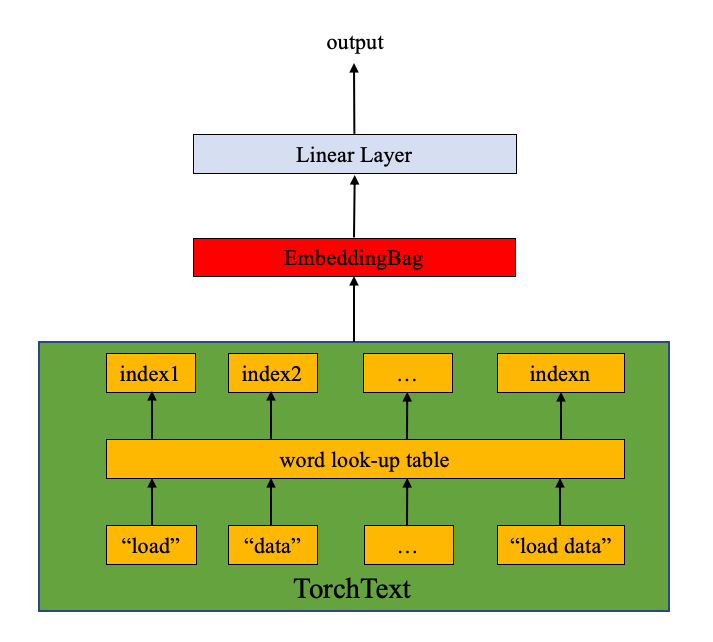

## Modelling Starts

### Case1: Freeze = False || PretrainedEmbedding=True || LSTM Input is Single Sentence Embedding

In [64]:
class myTextClassificationModel(torch.nn.Module):
    
    def __init__(self, word_embedding_matrix_tensor, vocab_size, embed_size, hidden_size):
        super(myTextClassificationModel, self).__init__()
        self.embedding = torch.nn.EmbeddingBag(vocab_size, embed_size, sparse=False, mode='mean')
        self.embedding = self.embedding.from_pretrained(word_embedding_matrix_tensor, freeze=False)
        self.lstm_block_1 = torch.nn.LSTM(embed_size, hidden_size, num_layers=2, batch_first=True,
                                          dropout=0.2,  bidirectional=False)
        #  When you increase num_layers, you're stacking multiple LSTMs on top of each other, creating a "deep" LSTM
        # num_layers=2 means you have a 2-layer LSTM. The first LSTM layer processes the input sequence and produces a new sequence, which is then processed by the second LSTM layer
        self.linear1 = torch.nn.Linear(hidden_size, int(hidden_size/2))
        self.relu1 = torch.nn.ReLU()
        self.batchNorm = torch.nn.BatchNorm1d(int(hidden_size/2))
        self.linear2 = torch.nn.Linear(int(hidden_size/2), 1)
        

    def forward(self, x):
        self.embedd = self.embedding(x)
        self.lstm_output, (self.hidden_state, self.cell_state) = self.lstm_block_1(self.embedd)
        # self.lstm_out, _ = self.lstm_block_1(self.embedd)
        out = self.linear1(self.lstm_output)
        out = self.relu1(out)
        out = self.linear2(out)
        y_pred = torch.sigmoid(out)
        return y_pred
        
        

In [65]:
word_embedding_matrix_tensor = torch.tensor(word_embedding_matrix, dtype=torch.float32)

In [66]:
word_embedding_matrix.shape[0]

6903

In [67]:
embed_size


300

In [68]:
model = myTextClassificationModel(word_embedding_matrix_tensor=word_embedding_matrix_tensor, 
                                  vocab_size=word_embedding_matrix.shape[0],
                                  embed_size=embed_size,
                                  hidden_size=1024)

In [69]:
model.embedding(text_list[0:1])

tensor([[-2.5311e-03,  1.5311e-02,  2.0391e-03, -2.4990e-03, -5.5650e-04,
         -1.2496e-02,  1.5251e-02,  2.6357e-02, -2.4943e-03, -3.4570e-03,
          9.4362e-03, -8.3411e-03, -5.4750e-03,  1.0642e-03, -8.1969e-03,
         -8.2346e-03,  1.1457e-02,  6.4434e-03, -2.0448e-03, -9.8481e-03,
         -2.8177e-05,  1.5908e-03,  1.2101e-02,  7.8670e-03,  6.6671e-03,
          1.5282e-03, -1.4260e-02,  1.8385e-03, -2.9239e-03, -1.8831e-02,
          6.8420e-03, -4.5268e-03,  3.2474e-03,  4.1570e-03, -5.1082e-03,
          1.0298e-02,  5.5565e-03, -1.7939e-02,  1.5430e-04, -3.5900e-03,
         -2.0007e-03, -1.3660e-03, -1.7020e-03, -1.5071e-02,  2.6410e-03,
          2.2912e-02,  6.0880e-03,  2.8339e-03, -4.4097e-03,  1.0028e-02,
          9.3354e-03,  2.6564e-03, -2.8363e-03,  8.6295e-03, -4.1364e-03,
          1.8555e-02,  5.8636e-03,  1.7794e-03,  2.4131e-03, -5.5291e-04,
         -3.7932e-03, -5.2952e-03,  1.8672e-03,  1.3446e-03, -7.8438e-03,
          6.1212e-03, -9.0896e-03, -3.

In [70]:
model

myTextClassificationModel(
  (embedding): EmbeddingBag(6903, 300, mode='mean')
  (lstm_block_1): LSTM(300, 1024, num_layers=2, batch_first=True, dropout=0.2)
  (linear1): Linear(in_features=1024, out_features=512, bias=True)
  (relu1): ReLU()
  (batchNorm): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (linear2): Linear(in_features=512, out_features=1, bias=True)
)

In [71]:
# hidden_size = 256
learning_rate = .008
num_epochs=15
n_total_steps = len(train_embedding_dataloader)
print(n_total_steps)

70


In [72]:
criterion = torch.nn.BCELoss() ## Binary Cross Entropy Loss
optimizer = torch.optim.Adam(model.parameters(),lr = learning_rate)

In [73]:
model.train()

myTextClassificationModel(
  (embedding): EmbeddingBag(6903, 300, mode='mean')
  (lstm_block_1): LSTM(300, 1024, num_layers=2, batch_first=True, dropout=0.2)
  (linear1): Linear(in_features=1024, out_features=512, bias=True)
  (relu1): ReLU()
  (batchNorm): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (linear2): Linear(in_features=512, out_features=1, bias=True)
)

In [74]:
count = 0
# best_loss = float('inf')

for epoch in range(num_epochs):
    myloss = []
    for i, (sentence, label) in enumerate(train_embedding_dataloader):
        # model.train()

        count+=1
        y_pred = model(sentence)
         
        loss = criterion(torch.reshape(y_pred,(-1,)), label)
         
        optimizer.zero_grad()
         
        loss.backward()
         
        optimizer.step()
        
        myloss.append(round(loss.item(),5))
    
    # # This is done after each epoch when the entire data has been processed  
    # # Validation step (using training data for simplicity)
    # model.eval()
    # with torch.no_grad():
    #     val_outputs = model(val_input)
    #     val_loss = criterion(val_outputs, val_targets)
    
    # # Save the model if validation loss decreases -> To save the best model
    # if val_loss < best_loss:
    #     best_loss = val_loss
    #     torch.save(model.state_dict(), 'best_model.pth')
    #     print(f'Saved model at epoch {epoch+1} with validation loss: {val_loss:.4f}')
        
        
    print(f'Epoch {epoch+1} of {num_epochs}; Mean_Loss =  {round(np.mean(myloss),8)}')
         

Epoch 1 of 15; Mean_Loss =  0.46846843
Epoch 2 of 15; Mean_Loss =  0.40452629
Epoch 3 of 15; Mean_Loss =  0.39704886
Epoch 4 of 15; Mean_Loss =  0.40425771
Epoch 5 of 15; Mean_Loss =  0.35022143
Epoch 6 of 15; Mean_Loss =  0.12358414
Epoch 7 of 15; Mean_Loss =  0.09106914
Epoch 8 of 15; Mean_Loss =  0.02811114
Epoch 9 of 15; Mean_Loss =  0.02138086
Epoch 10 of 15; Mean_Loss =  0.015195
Epoch 11 of 15; Mean_Loss =  0.01967614
Epoch 12 of 15; Mean_Loss =  0.02635557
Epoch 13 of 15; Mean_Loss =  0.015924
Epoch 14 of 15; Mean_Loss =  0.017781
Epoch 15 of 15; Mean_Loss =  0.00993843


In [81]:
label.shape, torch.reshape(y_pred,(-1,)).shape

(torch.Size([38]), torch.Size([38]))

In [82]:
from sklearn.metrics import roc_auc_score

In [83]:
 torch.reshape(y_pred,(-1,))

tensor([2.3502e-06, 5.1499e-06, 4.8741e-06, 9.8383e-01, 9.8245e-01, 5.0518e-06,
        5.0095e-06, 5.1325e-06, 4.8698e-06, 4.9691e-06, 5.1662e-06, 5.0776e-06,
        4.4735e-06, 4.8495e-06, 4.8905e-06, 7.3569e-06, 2.2917e-05, 4.8642e-06,
        5.1281e-06, 9.8382e-01, 3.9026e-06, 4.9406e-06, 4.8882e-06, 4.9670e-06,
        5.0147e-06, 5.1176e-06, 4.9332e-06, 4.9048e-06, 9.8427e-01, 3.3164e-06,
        6.7225e-06, 4.9036e-06, 4.7854e-06, 5.0990e-06, 4.9160e-06, 4.9198e-06,
        4.9614e-06, 5.1673e-06], grad_fn=<ViewBackward0>)

In [84]:
roc_auc_score(label, pd.DataFrame( torch.reshape(y_pred,(-1,)).detach().numpy()))

1.0

In [85]:
model.lstm_output.shape,model.hidden_state.shape,model.cell_state.shape

(torch.Size([38, 1024]), torch.Size([2, 1024]), torch.Size([2, 1024]))

In [86]:
model.embedding(text_list[0:1])
# Embedding is different than inital embedding

tensor([[-3.2037e-02,  2.4075e-02,  5.2767e-02,  2.4841e-02,  2.5708e-02,
          7.2467e-04, -2.3996e-03,  3.8022e-02, -5.7987e-02,  3.8418e-02,
         -6.3648e-03,  3.2829e-02,  2.1021e-02, -5.6401e-02,  8.5368e-03,
         -4.6573e-02,  3.9583e-02,  3.5226e-02, -4.9849e-02, -4.4531e-02,
          3.1795e-02,  1.9031e-02, -3.8776e-03,  4.7018e-02,  3.7603e-02,
          4.7477e-02,  1.2364e-04,  5.0426e-02,  4.7557e-02, -3.6992e-02,
          3.8336e-02,  2.2501e-02, -3.1308e-02,  4.8491e-02,  4.2646e-02,
          4.3219e-02, -3.0448e-02, -8.5416e-04,  4.0978e-02, -5.1342e-02,
          3.7104e-02, -5.3397e-02, -2.7824e-02, -3.8858e-02, -2.9833e-02,
          4.0681e-02,  3.8901e-02, -4.8343e-02,  2.4805e-02,  2.0835e-02,
         -1.3070e-02, -2.4470e-02, -1.9128e-02,  4.7975e-02, -4.7011e-02,
          1.8433e-03,  2.0840e-02,  5.5159e-02, -3.2106e-02,  2.5068e-02,
         -1.8955e-02,  2.2902e-02, -3.1627e-02, -3.6800e-02, -4.6534e-02,
         -2.6054e-02,  1.3490e-02,  2.

### Case2: Freeze = True || PretrainedEmbedding=True || LSTM Input is Single Sentence Embedding

In [87]:
class myTextClassificationModel(torch.nn.Module):
    
    def __init__(self, word_embedding_matrix_tensor, vocab_size, embed_size, hidden_size):
        super(myTextClassificationModel, self).__init__()
        self.embedding = torch.nn.EmbeddingBag(vocab_size, embed_size, sparse=False, mode='mean')
        self.embedding = self.embedding.from_pretrained(word_embedding_matrix_tensor, freeze=True)
        self.lstm_block_1 = torch.nn.LSTM(embed_size, hidden_size, num_layers=2, batch_first=True,
                                          dropout=0.2,  bidirectional=False)
        #  When you increase num_layers, you're stacking multiple LSTMs on top of each other, creating a "deep" LSTM
        # num_layers=2 means you have a 2-layer LSTM. The first LSTM layer processes the input sequence and produces a new sequence, which is then processed by the second LSTM layer
        self.linear1 = torch.nn.Linear(hidden_size, int(hidden_size/2))
        self.relu1 = torch.nn.ReLU()
        self.batchNorm = torch.nn.BatchNorm1d(int(hidden_size/2))
        self.linear2 = torch.nn.Linear(int(hidden_size/2), 1)
        

    def forward(self, x):
        self.embedd = self.embedding(x)
        self.lstm_output, (self.hidden_state, self.cell_state) = self.lstm_block_1(self.embedd)
        # self.lstm_out, _ = self.lstm_block_1(self.embedd)
        out = self.linear1(self.lstm_output)
        out = self.relu1(out)
        out = self.linear2(out)
        y_pred = torch.sigmoid(out)
        return y_pred
        
        

In [88]:
word_embedding_matrix_tensor = torch.tensor(word_embedding_matrix, dtype=torch.float32)

In [89]:
model = myTextClassificationModel(word_embedding_matrix_tensor=word_embedding_matrix_tensor, 
                                  vocab_size=word_embedding_matrix.shape[0],
                                  embed_size=embed_size,
                                  hidden_size=1024)

In [90]:
model

myTextClassificationModel(
  (embedding): EmbeddingBag(6903, 300, mode='mean')
  (lstm_block_1): LSTM(300, 1024, num_layers=2, batch_first=True, dropout=0.2)
  (linear1): Linear(in_features=1024, out_features=512, bias=True)
  (relu1): ReLU()
  (batchNorm): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (linear2): Linear(in_features=512, out_features=1, bias=True)
)

In [91]:
model.embedding(text_list[0:1])

tensor([[-2.5311e-03,  1.5311e-02,  2.0391e-03, -2.4990e-03, -5.5650e-04,
         -1.2496e-02,  1.5251e-02,  2.6357e-02, -2.4943e-03, -3.4570e-03,
          9.4362e-03, -8.3411e-03, -5.4750e-03,  1.0642e-03, -8.1969e-03,
         -8.2346e-03,  1.1457e-02,  6.4434e-03, -2.0448e-03, -9.8481e-03,
         -2.8177e-05,  1.5908e-03,  1.2101e-02,  7.8670e-03,  6.6671e-03,
          1.5282e-03, -1.4260e-02,  1.8385e-03, -2.9239e-03, -1.8831e-02,
          6.8420e-03, -4.5268e-03,  3.2474e-03,  4.1570e-03, -5.1082e-03,
          1.0298e-02,  5.5565e-03, -1.7939e-02,  1.5430e-04, -3.5900e-03,
         -2.0007e-03, -1.3660e-03, -1.7020e-03, -1.5071e-02,  2.6410e-03,
          2.2912e-02,  6.0880e-03,  2.8339e-03, -4.4097e-03,  1.0028e-02,
          9.3354e-03,  2.6564e-03, -2.8363e-03,  8.6295e-03, -4.1364e-03,
          1.8555e-02,  5.8636e-03,  1.7794e-03,  2.4131e-03, -5.5291e-04,
         -3.7932e-03, -5.2952e-03,  1.8672e-03,  1.3446e-03, -7.8438e-03,
          6.1212e-03, -9.0896e-03, -3.

In [93]:
# hidden_size = 256
learning_rate = .008
num_epochs=15
n_total_steps = len(train_embedding_dataloader)
print(n_total_steps)

70


In [94]:
criterion = torch.nn.BCELoss() ## Binary Cross Entropy Loss
optimizer = torch.optim.Adam(model.parameters(),lr = learning_rate)

In [95]:
model.train()

myTextClassificationModel(
  (embedding): EmbeddingBag(6903, 300, mode='mean')
  (lstm_block_1): LSTM(300, 1024, num_layers=2, batch_first=True, dropout=0.2)
  (linear1): Linear(in_features=1024, out_features=512, bias=True)
  (relu1): ReLU()
  (batchNorm): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (linear2): Linear(in_features=512, out_features=1, bias=True)
)

In [97]:
%%time 
count = 0
# epochs=2

for epoch in range(num_epochs):
    myloss = []
    for i, (sentence, label) in enumerate(train_embedding_dataloader):
        # sentence = sentence.unsqueeze(0)
        count+=1
        y_pred = model(sentence)
         
        loss = criterion(torch.reshape(y_pred,(-1,)), label)
         
        optimizer.zero_grad()
         
        loss.backward()
         
        optimizer.step()
        
        myloss.append(round(loss.item(),5))
    print(f'Epoch {epoch+1} of {num_epochs}; Mean_Loss =  {round(np.mean(myloss),8)}')
         

Epoch 1 of 15; Mean_Loss =  0.39722271
Epoch 2 of 15; Mean_Loss =  0.39521271
Epoch 3 of 15; Mean_Loss =  0.39546657
Epoch 4 of 15; Mean_Loss =  0.39479157
Epoch 5 of 15; Mean_Loss =  0.39453529
Epoch 6 of 15; Mean_Loss =  0.39501043
Epoch 7 of 15; Mean_Loss =  0.39457714
Epoch 8 of 15; Mean_Loss =  0.39441671
Epoch 9 of 15; Mean_Loss =  0.39359971
Epoch 10 of 15; Mean_Loss =  0.39442214
Epoch 11 of 15; Mean_Loss =  0.39217629
Epoch 12 of 15; Mean_Loss =  0.39330229
Epoch 13 of 15; Mean_Loss =  0.39351514
Epoch 14 of 15; Mean_Loss =  0.39175557
Epoch 15 of 15; Mean_Loss =  0.39056757
CPU times: total: 24min 40s
Wall time: 15min 17s


In [98]:
model.embedding(text_list[0:1])

tensor([[-2.5311e-03,  1.5311e-02,  2.0391e-03, -2.4990e-03, -5.5650e-04,
         -1.2496e-02,  1.5251e-02,  2.6357e-02, -2.4943e-03, -3.4570e-03,
          9.4362e-03, -8.3411e-03, -5.4750e-03,  1.0642e-03, -8.1969e-03,
         -8.2346e-03,  1.1457e-02,  6.4434e-03, -2.0448e-03, -9.8481e-03,
         -2.8177e-05,  1.5908e-03,  1.2101e-02,  7.8670e-03,  6.6671e-03,
          1.5282e-03, -1.4260e-02,  1.8385e-03, -2.9239e-03, -1.8831e-02,
          6.8420e-03, -4.5268e-03,  3.2474e-03,  4.1570e-03, -5.1082e-03,
          1.0298e-02,  5.5565e-03, -1.7939e-02,  1.5430e-04, -3.5900e-03,
         -2.0007e-03, -1.3660e-03, -1.7020e-03, -1.5071e-02,  2.6410e-03,
          2.2912e-02,  6.0880e-03,  2.8339e-03, -4.4097e-03,  1.0028e-02,
          9.3354e-03,  2.6564e-03, -2.8363e-03,  8.6295e-03, -4.1364e-03,
          1.8555e-02,  5.8636e-03,  1.7794e-03,  2.4131e-03, -5.5291e-04,
         -3.7932e-03, -5.2952e-03,  1.8672e-03,  1.3446e-03, -7.8438e-03,
          6.1212e-03, -9.0896e-03, -3.

### Case3: Freeze = NA || PretrainedEmbedding= No || LSTM Input is Single Sentence Embedding

In [99]:
class myTextClassificationModel(torch.nn.Module):
    
    def __init__(self, vocab_size, embed_size, hidden_size):
        super(myTextClassificationModel, self).__init__()
        self.embedding = torch.nn.EmbeddingBag(vocab_size, embed_size, sparse=False, mode='mean')
        # self.embedding = self.embedding.from_pretrained(word_embedding_matrix_tensor, freeze=True)
        self.lstm_block_1 = torch.nn.LSTM(embed_size, hidden_size, num_layers=2, batch_first=True,
                                          dropout=0.2,  bidirectional=False)
        #  When you increase num_layers, you're stacking multiple LSTMs on top of each other, creating a "deep" LSTM
        # num_layers=2 means you have a 2-layer LSTM. The first LSTM layer processes the input sequence and produces a new sequence, which is then processed by the second LSTM layer
        self.linear1 = torch.nn.Linear(hidden_size, int(hidden_size/2))
        self.relu1 = torch.nn.ReLU()
        self.batchNorm = torch.nn.BatchNorm1d(int(hidden_size/2))
        self.linear2 = torch.nn.Linear(int(hidden_size/2), 1)
        

    def forward(self, x):
        self.embedd = self.embedding(x)
        self.lstm_output, (self.hidden_state, self.cell_state) = self.lstm_block_1(self.embedd)
        # self.lstm_out, _ = self.lstm_block_1(self.embedd)
        out = self.linear1(self.lstm_output)
        out = self.relu1(out)
        out = self.linear2(out)
        y_pred = torch.sigmoid(out)
        return y_pred
        
        

In [100]:
model = myTextClassificationModel( vocab_size=word_embedding_matrix.shape[0],
                                  embed_size=embed_size,
                                  hidden_size=1024)

In [101]:
model

myTextClassificationModel(
  (embedding): EmbeddingBag(6903, 300, mode='mean')
  (lstm_block_1): LSTM(300, 1024, num_layers=2, batch_first=True, dropout=0.2)
  (linear1): Linear(in_features=1024, out_features=512, bias=True)
  (relu1): ReLU()
  (batchNorm): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (linear2): Linear(in_features=512, out_features=1, bias=True)
)

In [102]:
# hidden_size = 256
learning_rate = .008
num_epochs=15
n_total_steps = len(train_embedding_dataloader)
print(n_total_steps)

70


In [103]:
criterion = torch.nn.BCELoss() ## Binary Cross Entropy Loss
optimizer = torch.optim.Adam(model.parameters(),lr = learning_rate)

In [104]:
model.train()

myTextClassificationModel(
  (embedding): EmbeddingBag(6903, 300, mode='mean')
  (lstm_block_1): LSTM(300, 1024, num_layers=2, batch_first=True, dropout=0.2)
  (linear1): Linear(in_features=1024, out_features=512, bias=True)
  (relu1): ReLU()
  (batchNorm): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (linear2): Linear(in_features=512, out_features=1, bias=True)
)

In [105]:
%%time 
count = 0
# epochs=2

for epoch in range(num_epochs):
    myloss = []
    for i, (sentence, label) in enumerate(train_embedding_dataloader):
        # sentence = sentence.unsqueeze(0)
        count+=1
        y_pred = model(sentence)
         
        loss = criterion(torch.reshape(y_pred,(-1,)), label)
         
        optimizer.zero_grad()
         
        loss.backward()
         
        optimizer.step()
        
        myloss.append(round(loss.item(),5))
    print(f'Epoch {epoch+1} of {num_epochs}; Mean_Loss =  {round(np.mean(myloss),8)}')
         

Epoch 1 of 15; Mean_Loss =  0.49891314
Epoch 2 of 15; Mean_Loss =  0.39663329
Epoch 3 of 15; Mean_Loss =  0.39681957
Epoch 4 of 15; Mean_Loss =  0.39682157
Epoch 5 of 15; Mean_Loss =  0.39667357
Epoch 6 of 15; Mean_Loss =  0.39652686
Epoch 7 of 15; Mean_Loss =  0.39644086
Epoch 8 of 15; Mean_Loss =  0.39638129
Epoch 9 of 15; Mean_Loss =  0.39631486
Epoch 10 of 15; Mean_Loss =  0.39622129
Epoch 11 of 15; Mean_Loss =  0.39611171
Epoch 12 of 15; Mean_Loss =  0.39598286
Epoch 13 of 15; Mean_Loss =  0.39584114
Epoch 14 of 15; Mean_Loss =  0.395695
Epoch 15 of 15; Mean_Loss =  0.395552
CPU times: total: 52min 15s
Wall time: 31min 36s


In [106]:
len(text_list[0])*64

11264

#### Homework w.r.t Case 1,2,3:

In [107]:
#1. Do trian-val-test split
#2.1 Along with training add a code for eval also
#2.2 make model.train and model.eval respectively in the for loop
#2.3 plot the model loss on eval data
#2.4 now, finally test the model on test data

## REPEAT FOR BOTH APPROACHES: Freeze=True / Freeze=False


### Case4: Freeze = NA || PretrainedEmbedding=No || LSTM input is one word at a time -> Sequential data
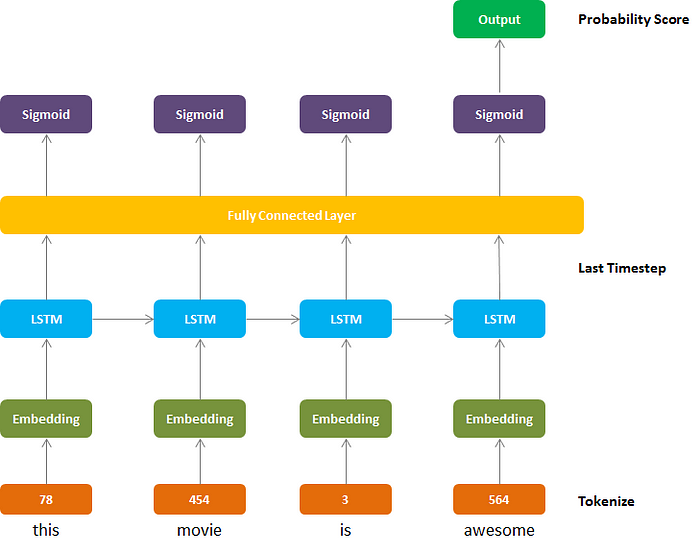

In [108]:
class myTextClassificationModel(torch.nn.Module):
    
    def __init__(self, vocab_size, embed_size, hidden_size):
        super(myTextClassificationModel, self).__init__()
        self.hidden_size = hidden_size
        # self.embedding = torch.nn.EmbeddingBag(vocab_size, embed_size, sparse=False, mode='mean')
        # self.embedding = self.embedding.from_pretrained(word_embedding_matrix_tensor, freeze=True)
        self.embedding = torch.nn.Embedding(vocab_size, embed_size, sparse=False)
        
        self.lstm_block_1 = torch.nn.LSTM(embed_size, hidden_size, num_layers=2, batch_first=True,
                                          dropout=0.2,  bidirectional=False)
        #  When you increase num_layers, you're stacking multiple LSTMs on top of each other, creating a "deep" LSTM
        # num_layers=2 means you have a 2-layer LSTM. The first LSTM layer processes the input sequence and produces a new sequence, which is then processed by the second LSTM layer
        
        self.linear1 = torch.nn.Linear(hidden_size, 1)
        

    def forward(self, x):
        self.embedd = self.embedding(x)
        self.lstm_output, (self.hidden_state, self.cell_state) = self.lstm_block_1(self.embedd)
        self.lstm_output1 = self.lstm_output.contiguous().view(-1, self.hidden_size)
        self.out = self.linear1(self.lstm_output1)
        self.y_pred = torch.sigmoid(self.out)
        self.y_pred = self.y_pred.view(x.size(0),-1)
        self.y_pred = self.y_pred[:,-1]
        return self.y_pred
         

In [109]:
model = myTextClassificationModel( vocab_size=word_embedding_matrix.shape[0],
                                  embed_size=embed_size,
                                  hidden_size=1024)

In [110]:
model

myTextClassificationModel(
  (embedding): Embedding(6903, 300)
  (lstm_block_1): LSTM(300, 1024, num_layers=2, batch_first=True, dropout=0.2)
  (linear1): Linear(in_features=1024, out_features=1, bias=True)
)

In [111]:
# hidden_size = 256
learning_rate = .008
num_epochs=15
n_total_steps = len(train_embedding_dataloader)
print(n_total_steps)

70


In [112]:
criterion = torch.nn.BCELoss() ## Binary Cross Entropy Loss
optimizer = torch.optim.Adam(model.parameters(),lr = learning_rate)

In [113]:
model.train()

myTextClassificationModel(
  (embedding): Embedding(6903, 300)
  (lstm_block_1): LSTM(300, 1024, num_layers=2, batch_first=True, dropout=0.2)
  (linear1): Linear(in_features=1024, out_features=1, bias=True)
)

In [114]:
%%time 
count = 0
num_epochs=2

for epoch in range(num_epochs):
    myloss = []
    for i, (sentence, label) in enumerate(train_embedding_dataloader):
        # sentence = sentence.unsqueeze(0)
        count+=1
        y_pred = model(sentence)
         
        loss = criterion(torch.reshape(y_pred,(-1,)), label)
         
        optimizer.zero_grad()
         
        loss.backward()
         
        optimizer.step()
        
        myloss.append(round(loss.item(),5))
    print(f'Epoch {epoch+1} of {num_epochs}; Mean_Loss =  {round(np.mean(myloss),8)}')
         

Epoch 1 of 2; Mean_Loss =  0.45948771
Epoch 2 of 2; Mean_Loss =  0.40922
CPU times: total: 2h 42min 33s
Wall time: 1h 32min 39s


* NOTE: This process is very time consuming as it processes each word at a time
In our previous cases, we would take single embedding of a sentence and processes it i,e processing entire sentence in one go

#### Explanation of Case 4 working
* reference: https://freedium.cfd/https://towardsdatascience.com/sentiment-analysis-using-lstm-step-by-step-50d074f09948

In [115]:
sample_input = text_list[0:2]
sample_input

tensor([[ 754,  104,   34,  104,  562,   34,   71,   19, 2028,    2,  210,    5,
          274,   74,  107, 6902, 6902, 6902, 6902, 6902, 6902, 6902, 6902, 6902,
         6902, 6902, 6902, 6902, 6902, 6902, 6902, 6902, 6902, 6902, 6902, 6902,
         6902, 6902, 6902, 6902, 6902, 6902, 6902, 6902, 6902, 6902, 6902, 6902,
         6902, 6902, 6902, 6902, 6902, 6902, 6902, 6902, 6902, 6902, 6902, 6902,
         6902, 6902, 6902, 6902, 6902, 6902, 6902, 6902, 6902, 6902, 6902, 6902,
         6902, 6902, 6902, 6902, 6902, 6902, 6902, 6902, 6902, 6902, 6902, 6902,
         6902, 6902, 6902, 6902, 6902, 6902, 6902, 6902, 6902, 6902, 6902, 6902,
         6902, 6902, 6902, 6902, 6902, 6902, 6902, 6902, 6902, 6902, 6902, 6902,
         6902, 6902, 6902, 6902, 6902, 6902, 6902, 6902, 6902, 6902, 6902, 6902,
         6902, 6902, 6902, 6902, 6902, 6902, 6902, 6902, 6902, 6902, 6902, 6902,
         6902, 6902, 6902, 6902, 6902, 6902, 6902, 6902, 6902, 6902, 6902, 6902,
         6902, 6902, 6902, 6

In [116]:
embed_output = model.embedding(sample_input)
embed_output.shape, embed_output
# 2 sentences having 176 tokens and each token's embedding is of size 300

(torch.Size([2, 176, 300]),
 tensor([[[ 1.2995,  0.5491, -1.9101,  ...,  0.0746, -0.5163,  0.5338],
          [-1.0527, -1.4036,  0.8498,  ..., -1.0705,  2.5428,  1.0359],
          [-0.8648, -0.5828, -0.8770,  ..., -1.9798, -1.9021,  0.0106],
          ...,
          [-0.5003,  0.1386,  1.0186,  ...,  0.8063,  0.7325, -0.2389],
          [-0.5003,  0.1386,  1.0186,  ...,  0.8063,  0.7325, -0.2389],
          [-0.5003,  0.1386,  1.0186,  ...,  0.8063,  0.7325, -0.2389]],
 
         [[-1.0844, -0.4149, -0.6391,  ...,  1.0941,  1.4230, -1.3958],
          [-1.0716,  1.8431,  0.5086,  ...,  0.2323,  0.2359,  0.5451],
          [-0.4784, -2.3049, -0.1897,  ...,  1.2943,  1.5116, -0.3221],
          ...,
          [-0.5003,  0.1386,  1.0186,  ...,  0.8063,  0.7325, -0.2389],
          [-0.5003,  0.1386,  1.0186,  ...,  0.8063,  0.7325, -0.2389],
          [-0.5003,  0.1386,  1.0186,  ...,  0.8063,  0.7325, -0.2389]]],
        grad_fn=<EmbeddingBackward0>))

In [117]:
o, (h, c) = model.lstm_block_1(embed_output)
# LSTM gives 3 outputs: putput_state, hidden_state, and cell state for each token
# Hence the shape of O:
# 1 is for number of sentences
# 176 is for number o tokens
# 1024 is the embedding size after passing through LSTM

In [118]:
o.shape
# This o has output of each input token

torch.Size([2, 176, 1024])

In [119]:
o_reshaped = o.contiguous().view(-1, 1024)
o_reshaped.shape
# Changing the shape to concatenate number of sentences i.e 176(1st sentence) + 176 (2nd sentence)

torch.Size([352, 1024])

In [120]:
model.linear1

Linear(in_features=1024, out_features=1, bias=True)

In [121]:
o_to_linear = model.linear1(o_reshaped)
o_to_linear.shape
# Passing through linear layer i.e passing all the words from all the sentences through linear layer
# Now, this gives one value for each word in 2 sentences hence size is 352,1

torch.Size([352, 1])

In [122]:
o_to_linear

tensor([[ 1.5796],
        [-1.0311],
        [-1.0517],
        [-1.0545],
        [-1.0548],
        [-1.0549],
        [-1.0549],
        [-1.0549],
        [-1.0549],
        [-1.0549],
        [-1.0549],
        [-1.0549],
        [-1.0549],
        [-1.0549],
        [-1.0549],
        [-1.0549],
        [-1.0549],
        [-1.0549],
        [-1.0549],
        [-1.0549],
        [-1.0549],
        [-1.0549],
        [-1.0549],
        [-1.0549],
        [-1.0549],
        [-1.0549],
        [-1.0549],
        [-1.0549],
        [-1.0549],
        [-1.0549],
        [-1.0549],
        [-1.0549],
        [-1.0549],
        [-1.0549],
        [-1.0549],
        [-1.0549],
        [-1.0549],
        [-1.0549],
        [-1.0549],
        [-1.0549],
        [-1.0549],
        [-1.0549],
        [-1.0549],
        [-1.0549],
        [-1.0549],
        [-1.0549],
        [-1.0549],
        [-1.0549],
        [-1.0549],
        [-1.0549],
        [-1.0549],
        [-1.0549],
        [-1.

In [123]:
#now pass each word's value through sigmoid
linear_to_sigmoid = torch.sigmoid(o_to_linear)
linear_to_sigmoid.shape

torch.Size([352, 1])

In [124]:
linear_to_sigmoid

tensor([[0.8292],
        [0.2629],
        [0.2589],
        [0.2584],
        [0.2583],
        [0.2583],
        [0.2583],
        [0.2583],
        [0.2583],
        [0.2583],
        [0.2583],
        [0.2583],
        [0.2583],
        [0.2583],
        [0.2583],
        [0.2583],
        [0.2583],
        [0.2583],
        [0.2583],
        [0.2583],
        [0.2583],
        [0.2583],
        [0.2583],
        [0.2583],
        [0.2583],
        [0.2583],
        [0.2583],
        [0.2583],
        [0.2583],
        [0.2583],
        [0.2583],
        [0.2583],
        [0.2583],
        [0.2583],
        [0.2583],
        [0.2583],
        [0.2583],
        [0.2583],
        [0.2583],
        [0.2583],
        [0.2583],
        [0.2583],
        [0.2583],
        [0.2583],
        [0.2583],
        [0.2583],
        [0.2583],
        [0.2583],
        [0.2583],
        [0.2583],
        [0.2583],
        [0.2583],
        [0.2583],
        [0.2583],
        [0.2583],
        [0

In [125]:
linear_to_sigmoid_grouped = linear_to_sigmoid.view(2,-1)
linear_to_sigmoid_grouped.shape
# Now changing the shape to batch_size, 1
# This helps to collect group the 352 size to its batches i.e 176 each
# Now, this represents that each word of sentence "X" was passed through LSTM, then through Linear Layer and Then through Sigmoid
# to ge the sigmoid value of each word --> This has beend done for all the sentences (in our example we have 2 sentences)

torch.Size([2, 176])

In [126]:
linear_to_sigmoid_grouped

tensor([[0.8292, 0.2629, 0.2589, 0.2584, 0.2583, 0.2583, 0.2583, 0.2583, 0.2583,
         0.2583, 0.2583, 0.2583, 0.2583, 0.2583, 0.2583, 0.2583, 0.2583, 0.2583,
         0.2583, 0.2583, 0.2583, 0.2583, 0.2583, 0.2583, 0.2583, 0.2583, 0.2583,
         0.2583, 0.2583, 0.2583, 0.2583, 0.2583, 0.2583, 0.2583, 0.2583, 0.2583,
         0.2583, 0.2583, 0.2583, 0.2583, 0.2583, 0.2583, 0.2583, 0.2583, 0.2583,
         0.2583, 0.2583, 0.2583, 0.2583, 0.2583, 0.2583, 0.2583, 0.2583, 0.2583,
         0.2583, 0.2583, 0.2583, 0.2583, 0.2583, 0.2583, 0.2583, 0.2583, 0.2583,
         0.2583, 0.2583, 0.2583, 0.2583, 0.2583, 0.2583, 0.2583, 0.2583, 0.2583,
         0.2583, 0.2583, 0.2583, 0.2583, 0.2583, 0.2583, 0.2583, 0.2583, 0.2583,
         0.2583, 0.2583, 0.2583, 0.2583, 0.2583, 0.2583, 0.2583, 0.2583, 0.2583,
         0.2583, 0.2583, 0.2583, 0.2583, 0.2583, 0.2583, 0.2583, 0.2583, 0.2583,
         0.2583, 0.2583, 0.2583, 0.2583, 0.2583, 0.2583, 0.2583, 0.2583, 0.2583,
         0.2583, 0.2583, 0.2

In [127]:
linear_to_sigmoid_grouped[:,-1]
# This means take the last value of each sentence i.e. sigmoid value of last word that was processed in LSTM and Linear layer
# This is what we used to compare with actual target values and compute loss

tensor([0.2583, 0.2583], grad_fn=<SelectBackward0>)

#### Homework for case 4:
* Try with padding at the front instead of at the last